In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import sklearn

import xgboost as xgb
import lightgbm as lgb
import catboost

In [2]:
# Methods
from sklearn.linear_model import LinearRegression

# Model selection and evaluation tools
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score,  mean_absolute_error

1. Given a fixed number of trees, increasing the maximum tree depth in boosting increases the capacity of the model - True
2. In boosting, we want each tree to have high flexibility to fit the training data. - False


High Flexibility -> Overfit -> Big Trees

In [3]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()

data = pd.DataFrame(np.c_[data.data, data.target], columns = data.feature_names + ['MedianHouseValue'])
data.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedianHouseValue
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [4]:
response = data.columns[-1] # last column in the dataframe
predictors= list(data.columns[:-1]) # all columns except the last
    
index_train, index_valid  = train_test_split(np.array(data.index), train_size=0.2, random_state=1)

train = data.loc[index_train, :].copy()
valid =  data.loc[index_valid, :].copy()

y_train = np.log(train[response])
y_valid = np.log(valid[response])

X_train = train[predictors].to_numpy()
X_valid = valid[predictors].to_numpy()

In [34]:
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference=train_data)

params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'l2',
    'learning_rate': 0.01,
    'num_leaves': 31,
    'lambda_l1': 0.0, 
    'lambda_l2': 0.0, 
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'feature_fraction': 0.9,
    'min_data_in_leaf': 20, 
}

evals_small_trees = {} 

lgbm = lgb.train(params, train_data, num_boost_round=2000, valid_sets=[train_data, valid_data], 
                 valid_names=['Training', 'Validation'], evals_result=evals_small_trees, verbose_eval=False)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000516 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 4128, number of used features: 8
[LightGBM] [Info] Start training from score 0.573084


In [44]:
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference=train_data)

params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'l2',
    'learning_rate': 0.01,
    'num_leaves': 200,
    'lambda_l1': 0.0, 
    'lambda_l2': 0.0, 
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'feature_fraction': 0.9,
    'min_data_in_leaf': 1, 
}

evals_big_trees = {} 

lgbm = lgb.train(params, train_data, num_boost_round=2000, valid_sets=[train_data, valid_data], 
                 valid_names=['Training', 'Validation'], evals_result=evals_big_trees, verbose_eval=False)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000558 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 4128, number of used features: 8
[LightGBM] [Info] Start training from score 0.573084


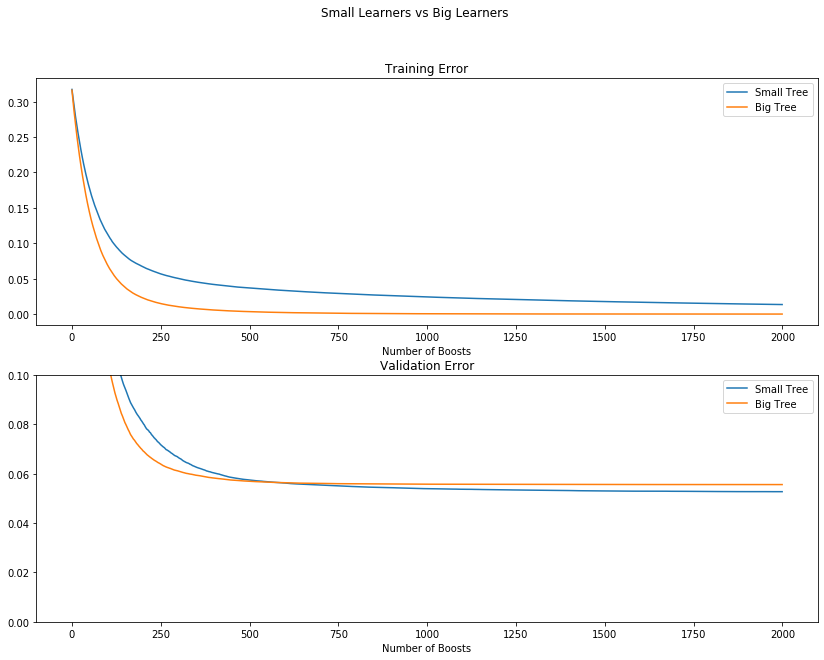

In [69]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(evals_small_trees['Training']["l2"], label="Small Tree")
plt.plot(evals_big_trees['Training']["l2"], label="Big Tree")
plt.legend()
plt.title("Training Error")
plt.xlabel("Number of Boosts")

plt.subplot(2, 1, 2)
plt.plot(evals_small_trees['Validation']["l2"], label="Small Tree")
plt.plot(evals_big_trees['Validation']["l2"], label="Big Tree")
plt.title("Validation Error")
plt.xlabel("Number of Boosts")
plt.legend()
plt.ylim(0, 0.1)

plt.suptitle("Small Learners vs Big Learners");

In [63]:
train_data = lgb.Dataset(X_train, y_train)
valid_data = lgb.Dataset(X_valid, y_valid, reference=train_data)

params = {
    'objective': 'regression',
    'boosting_type': 'gbdt',
    'metric': 'l2',
    'learning_rate': 0.05,
    'num_leaves': 31,
    'lambda_l1': 0.0, 
    'lambda_l2': 0.0, 
    'bagging_fraction': 0.9,
    'bagging_freq': 5,
    'feature_fraction': 0.9,
    'min_data_in_leaf': 20, 
}

evals_high_learning_rate = {} 

lgbm = lgb.train(params, train_data, num_boost_round=2000, valid_sets=[train_data, valid_data], 
                 valid_names=['Training', 'Validation'], evals_result=evals_high_learning_rate, 
                 verbose_eval=False)

[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000513 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 4128, number of used features: 8
[LightGBM] [Info] Start training from score 0.573084


3. Increasing the learning rate in boosting implies that we would need more trees to achieve a given training error. - False 

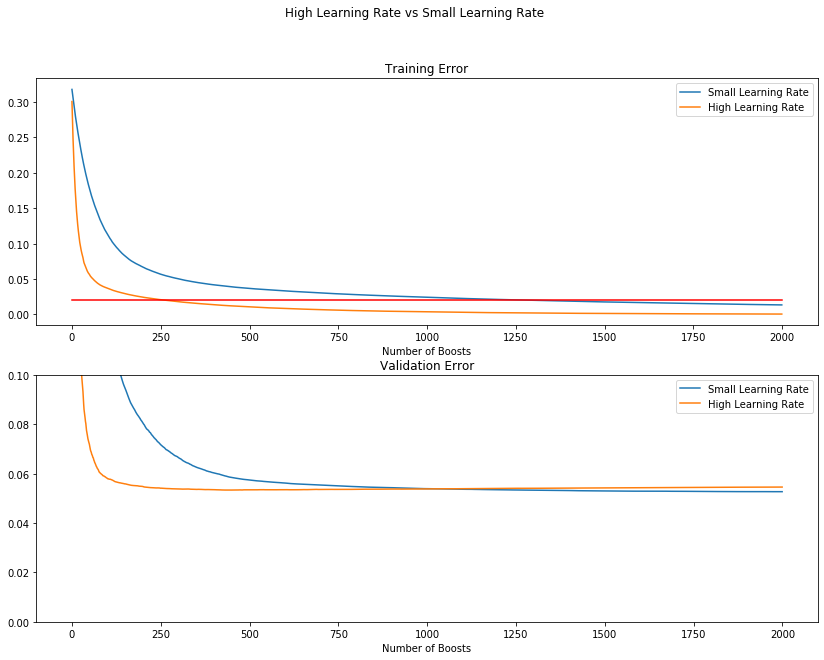

In [70]:
plt.figure(figsize=(14, 10))

plt.subplot(2, 1, 1)
plt.plot(evals_small_trees['Training']["l2"], label="Small Learning Rate")
plt.plot(evals_high_learning_rate['Training']["l2"], label="High Learning Rate")
plt.legend()
plt.title("Training Error")
plt.xlabel("Number of Boosts")

plt.plot([0, 2000], [0.02, 0.02], color='red')
# plt.plot([0, 2000], [0.05, 0.05], color='red')

plt.subplot(2, 1, 2)
plt.plot(evals_small_trees['Validation']["l2"], label="Small Learning Rate")
plt.plot(evals_high_learning_rate['Validation']["l2"], label="High Learning Rate")
plt.title("Validation Error")
plt.xlabel("Number of Boosts")
plt.legend()
plt.ylim(0, 0.1)

plt.suptitle("High Learning Rate vs Small Learning Rate");

## We use cost-complexity pruning in random forests - False

## In least squares boosting, we grow each regression tree until the algorithm reaches a minimum node size. 


## Using a large number of trees in a random forest leads to overfitting. - False

Overfitting - Low Bias, high variance

Random Forests - Lower Variance, Slightly Higher Bias

## Pasting (subsampling) reduces the computational cost of a random forest relative to using bootstrap samples. 

Pasting - Sampling without replacement
    - Big datasets
    - Slightly smaller bias

Bootstrap - Sampling with replacement
    - Small Datasets
    - Slightly higher bias